# 线性判别分析
- Linear Discriminant Analysis
- 主要用于数据降维

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 数据加载

In [18]:
f = open('ex3blue.dat','r+')
blue = f.readlines()
blue = [b.strip('\n').split() for b in blue]
blue = np.array([[float(b) for b in bs] for bs in blue])

f = open('ex3green.dat','r+')
green = f.readlines()
green = [g.strip('\n').split() for g in green]
green = np.array([[float(g) for g in gs] for gs in green])

f = open('ex3red.dat','r+')
red = f.readlines()
red = [r.strip('\n').split() for r in red]
red = np.array([[float(r) for r in rs] for rs in red])

### 散点图可视化原始点

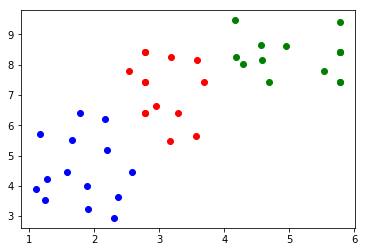

In [27]:
plt.plot(red[:,0],red[:,1],'o',color = 'red')
plt.plot(blue[:,0],blue[:,1],'o',color = 'blue')
plt.plot(green[:,0],green[:,1],'o',color = 'green')

### 线性映射
- y = theta.T * x
- 均值：𝝁𝑖 = 1 /𝑛 * sum(𝒙)
- 类内散度：𝑺𝑤 = sum(𝑺𝑤𝑖), 𝑺𝑤𝑖 = sum((𝒙−𝝁𝑖)(𝒙−𝝁𝑖)𝑻)
- 类间散度：𝑺𝑏 = sum(𝑛𝑖(𝝁𝑖 −𝝁)(𝝁𝑖 −𝝁)𝑻） 

In [86]:
mu_blue = np.array([np.mean(blue[:,0]),np.mean(blue[:,1])])
mu_red = np.array([np.mean(red[:,0]),np.mean(red[:,1])])
mu_green = np.array([np.mean(green[:,0]),np.mean(green[:,1])])
b_len = len(blue)
r_len = len(red)
g_len = len(green)
N = b_len+r_len+g_len

mu = np.array((b_len*mu_blue+r_len*mu_red +g_len*mu_green)/N)

Swb = np.zeros([2,2])
Swr = np.zeros([2,2])
Swg = np.zeros([2,2])
##d * d 维初始化

for a in blue:
    Swb += np.array([(a - mu_blue)]).T.dot(np.array([(a - mu_blue)]))
for r in red:
    Swr += np.array([(r - mu_red)]).T.dot(np.array([(r - mu_red)]))
for g in green:
    Swg += np.array([(g - mu_green)]).T.dot(np.array([(g - mu_green)]))
Sw = Swb + Swr + Swg


Sb = b_len * np.array([(mu_blue - mu)]).T.dot(np.array([(mu_blue - mu)])) 
+ r_len * np.array([(mu_red - mu)]).T.dot(np.array([(mu_red - mu)]))
+ g_len * np.array([(mu_green - mu)]).T.dot(np.array([(mu_green - mu)]))

array([[45.14425714, 40.78665714],
       [40.78665714, 36.84967937]])

### 直接求解tehta
- tehtai 是 矩阵 𝑺𝑤 <sup>-1</sup> 𝑺𝑏 的特征向量
- thetai 尽量取对应的特征值大的特征向量

In [97]:
A = np.mat(Sw).I * Sb ##矩阵点乘

eigenvalue,featurevector=np.linalg.eig(A) ##矩阵的特征向量与特征值

#### 可以看到 5.47609258 为较大特征值

In [99]:
print(eigenvalue)
print(featurevector)

[5.47609258 0.        ]
[[ 0.90643433 -0.81405299]
 [ 0.42234679  0.5807906 ]]


In [131]:
blue[:,0]

array([2.58, 2.16, 1.27, 1.58, 1.16, 1.24, 1.1 , 1.78, 1.9 , 1.66, 2.2 ,
       1.89, 2.37, 2.3 ])

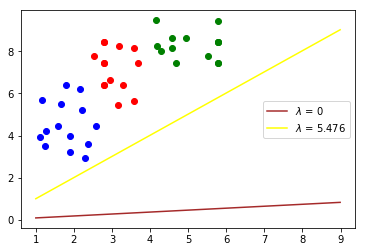

In [186]:
plt.plot(red[:,0],red[:,1],'o',color = 'red')
plt.plot(blue[:,0],blue[:,1],'o',color = 'blue')
plt.plot(green[:,0],green[:,1],'o',color = 'green')
theta1 = np.array(featurevector[0])[0]
x = np.arange(1,9,0.01)
y1 = theta1[1]*x + theta1[0]*x
theta2 = np.array(featurevector[1])[0]

y2 = theta2[1]*x + theta2[0]*x
plt.plot(x,y1,'-',color = 'brown',label = '$\lambda$ = 0')
plt.plot(x,y2,'-',color = 'yellow',label = '$\lambda$ = 5.476')

plt.legend()

### 下面分别对两种theta进行对比可视化
- 可以明显看出lambda = 5.46的效果更好

In [170]:
def gaussian(sigma, x, u):
    y = np.exp(-(x - u) ** 2 / (2 * sigma ** 2)) / (sigma * math.sqrt(2 * math.pi))
    return y

Text(0.5,0,'$\\lambda$ = 0')

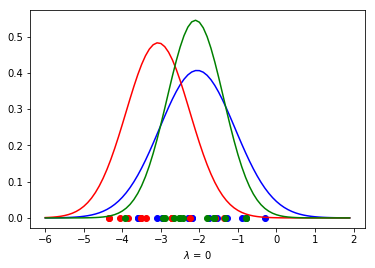

In [185]:
mu_blue_new1 = theta1.dot(mu_blue)
mu_red_new1 = theta1.dot(mu_red)
mu_green_new1 = theta1.dot(mu_green)

blue_y1 = [theta1.dot(b) for b in blue]
red_y1 = [theta1.dot(r) for r in red]
green_y1 = [theta1.dot(g) for g in green]

sigma_b1 = np.var(blue_y1)
sigma_r1 = np.var(red_y1)
sigma_g1 = np.var(green_y1)

x = np.arange(-6,2,0.1)

y_b1 = gaussian(sigma_b1,x,mu_blue_new1)
plt.plot(x,y_b1,'-',color = 'blue')
plt.plot(blue_y1,[0 for i in blue_y1],'o',color = 'blue')

y_r1 = gaussian(sigma_r1,x,mu_red_new1)
plt.plot(x,y_r1,'-',color = 'red')
plt.plot(red_y1,[0 for i in red_y1],'o',color = 'red')

y_r1 = gaussian(sigma_g1,x,mu_green_new1)
plt.plot(x,y_r1,'-',color = 'green')
plt.plot(green_y1,[0 for i in green_y1],'o',color = 'green')
plt.xlabel('$\lambda$ = 0')

Text(0.5,0,'$\\lambda$ = 5.476')

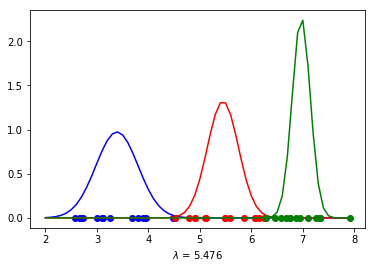

In [187]:
mu_blue_new2 = theta2.dot(mu_blue)
mu_red_new2 = theta2.dot(mu_red)
mu_green_new2 = theta2.dot(mu_green)

blue_y2 = [theta2.dot(b) for b in blue]
red_y2 = [theta2.dot(r) for r in red]
green_y2 = [theta2.dot(g) for g in green]

sigma_b2 = np.var(blue_y2)
sigma_r2 = np.var(red_y2)
sigma_g2 = np.var(green_y2)

x = np.arange(2,8,0.1)

y_b2 = gaussian(sigma_b2,x,mu_blue_new2)
plt.plot(x,y_b2,'-',color = 'blue')
plt.plot(blue_y2,[0 for i in blue_y2],'o',color = 'blue')

y_r2 = gaussian(sigma_r2,x,mu_red_new2)
plt.plot(x,y_r2,'-',color = 'red')
plt.plot(red_y2,[0 for i in red_y2],'o',color = 'red')

y_r2 = gaussian(sigma_g2,x,mu_green_new2)
plt.plot(x,y_r2,'-',color = 'green')
plt.plot(green_y2,[0 for i in green_y2],'o',color = 'green')
plt.xlabel('$\lambda$ = 5.476')